In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

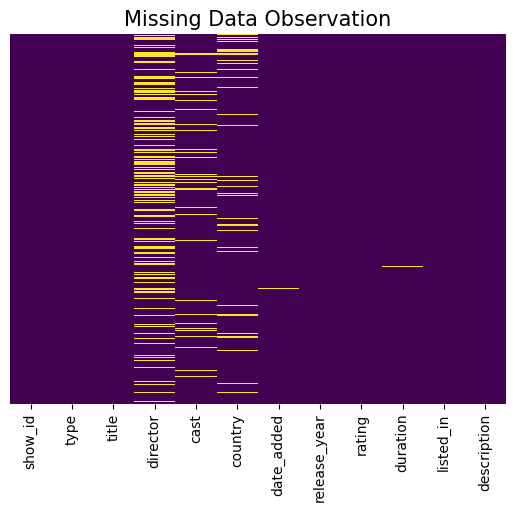

In [5]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis');
plt.title('Missing Data Observation', fontsize = 15)
plt.show()

In [6]:
type_value = df['type'].value_counts()
print(type_value)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_7772\3496134354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'type', palette = 'viridis', ax = axes[0])


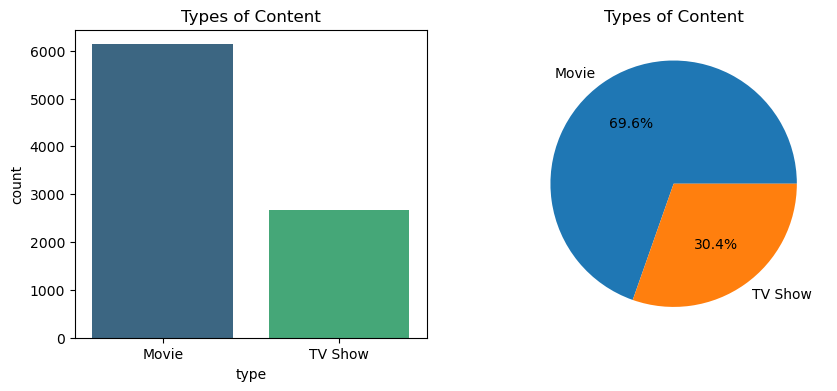

In [7]:
fig, axes = plt.subplots(1,2, figsize = (10, 4))

sns.countplot(data = df, x = 'type', palette = 'viridis', ax = axes[0])
axes[0].set_title('Types of Content')

axes[1].pie(type_value, labels = type_value.index, autopct = '%1.1f%%')
axes[1].set_title('Types of Content')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7772\2564257537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = director_film.index, y = director_film.values,  palette = 'viridis')


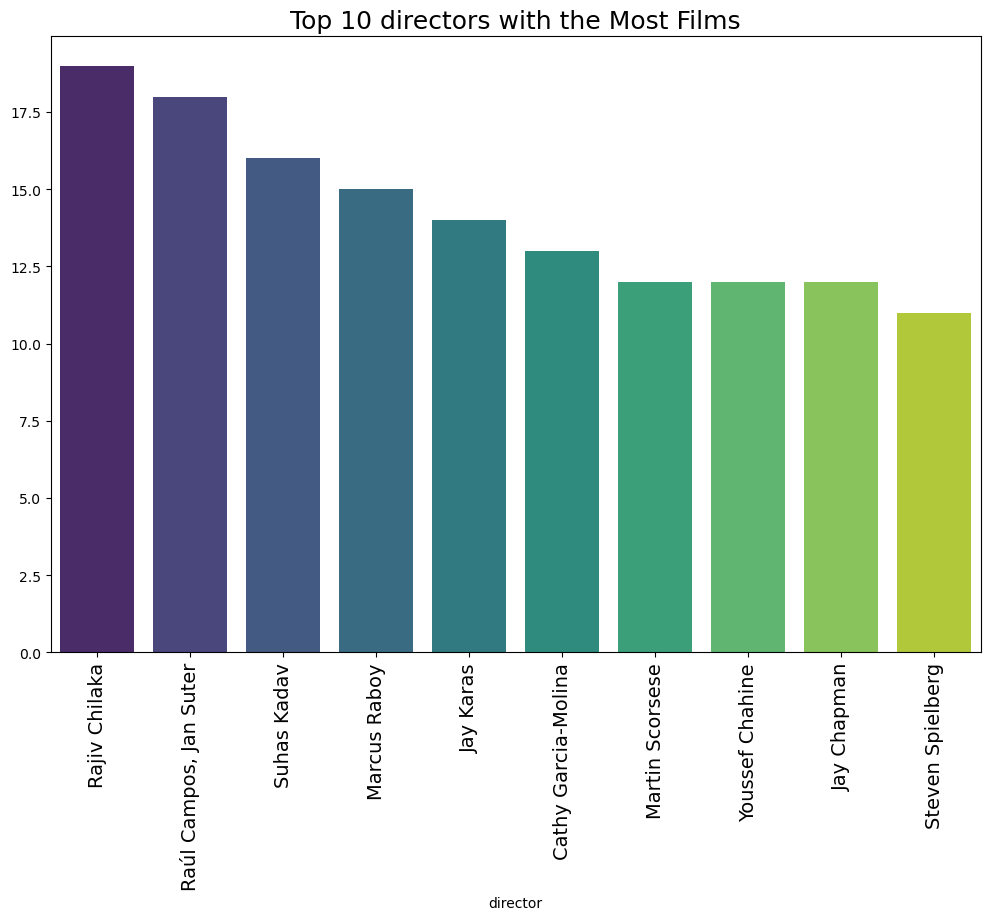

In [8]:
director_film = df[df['type'] == 'Movie']['director'].value_counts()[:10]

plt.figure(figsize = (12, 8))
sns.barplot(x = director_film.index, y = director_film.values,  palette = 'viridis')
plt.xticks(rotation = 90, fontsize = 14)
plt.title('Top 10 directors with the Most Films', fontsize = 18)
plt.show()

In [9]:
top10_country =  df['country'].value_counts().nlargest(10)
top10_country

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

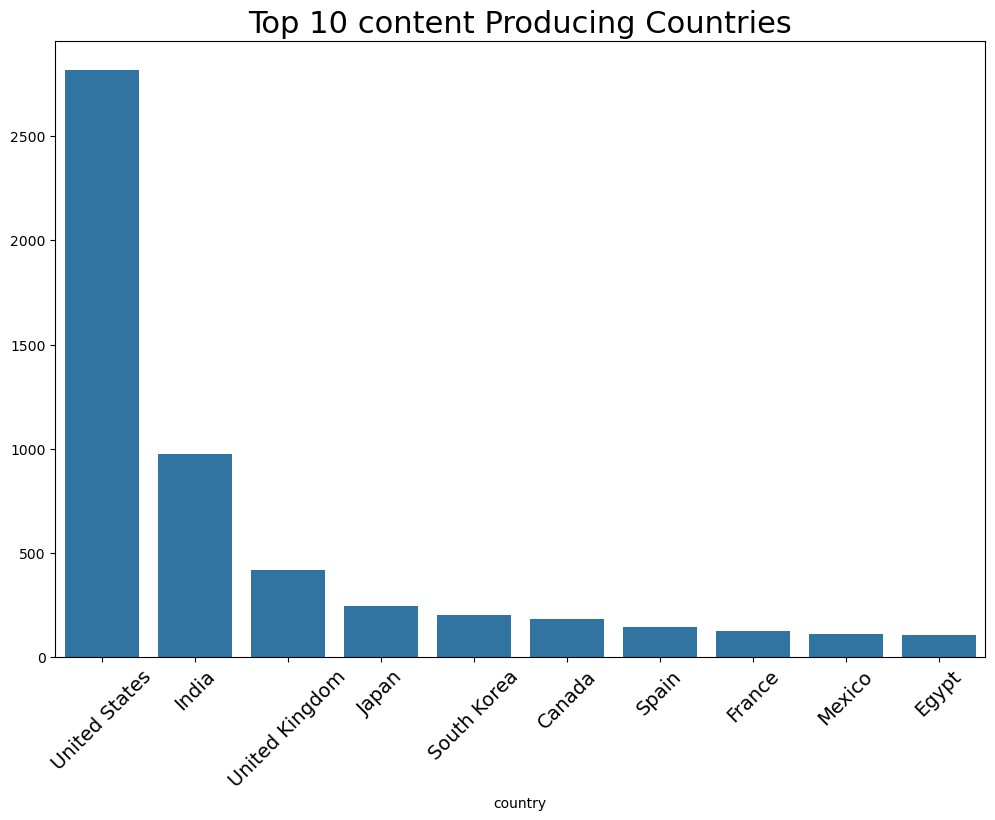

In [10]:
plt.figure(figsize = (12, 8))
sns.barplot(x = top10_country.index, y = top10_country.values)
plt.title('Top 10 content Producing Countries', fontsize = 22)
plt.xticks(rotation = 45, fontsize = 14)
plt.show()

In [11]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [12]:
import folium

In [13]:
top10_country = {
    'United States': {'count': 2818, 'coords' : [37.0902, -95.7219]},
    'India': {'count': 972, 'coords': [20.5937, 78.9629]}, 
    'United Kingdom': {'count': 419, 'coords': [51.5074, -0.1278]}, 
    'Japan': {'count': 245, 'coords': [36.2048, 138.2529]}, 
    'South Korea': {'count': 199, 'coords': [35.9078, 127.7669]}, 
    'Canada': {'count': 181, 'coords': [56.1304, -106.3468]}, 
    'Spain': {'count': 145, 'coords': [40.4637, -3.7492]}, 
    'France': {'count': 124, 'coords': [46.6034, 1.8883]}, 
    'Mexico': {'count': 110, 'coords': [23.6345, -102.5528]}, 
    'Egypt': {'count': 106, 'coords': [26.8206, 30.8025]}, 
    'Turkey': {'count': 105, 'coords': [38.9637, 35.2433]}, 
    'Nigeria': {'count': 95, 'coords': [9.082, 8.6753]}, 
    'Australia': {'count': 87, 'coords': [-25.2744, 133.7751]}, 
    'Taiwan': {'count': 81, 'coords': [23.6978, 120.9605]}, 
    'Indonesia': {'count': 79, 'coords': [-0.7893, 113.9213]}, 
    'Brazil': {'count': 77, 'coords': [-14.2350, -51.9253]}, 
    'Philippines': {'count': 75, 'coords': [12.8797, 121.7740]}, 
    'United Kingdom, United States': {'count': 75, 'coords': [51.5074, -0.1278]},  
    'United States, Canada': {'count': 73, 'coords': [56.1304, -106.3468]},  
    'Germany': {'count': 67, 'coords': [51.1657, 10.4515]},
}


cl = [
    [0.0, 'rgb(248,255,206)'],
    [0.2, 'rgb(203,255,205)'],
    [0.4, 'rgb(155,255,164)'],
    [0.6, 'rgb(79,255,178)'],
    [0.8, 'rgb(15,183,132)'],
    [1, '#008059'],
    
]

m = folium.Map(location=[20,0], zoom_start=2)

max_count = max([data['count'] for data in top10_country.values()])

for country, data in top10_country.items():
    coords = data['coords']
    count = data['count']

    normalized_count = count/max_count

    color_idx = int(normalized_count * (len(cl) - 1))
    color = cl[color_idx][1]

    folium.Marker(
        location=coords,
        popup=f'{country}:{count}',
        icon=folium.Icon(color, icon='info-sign')
    ).add_to(m)


m.save('top10_countries_map_with-custom_markers.html')
m

C:\Users\user\AppData\Local\Temp\ipykernel_7772\1190585378.py:51: UserWarning: color argument of Icon should be one of: {'darkgreen', 'beige', 'pink', 'darkpurple', 'darkred', 'lightred', 'black', 'blue', 'lightblue', 'gray', 'cadetblue', 'orange', 'red', 'lightgray', 'darkblue', 'purple', 'lightgreen', 'green', 'white'}.
  icon=folium.Icon(color, icon='info-sign')


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

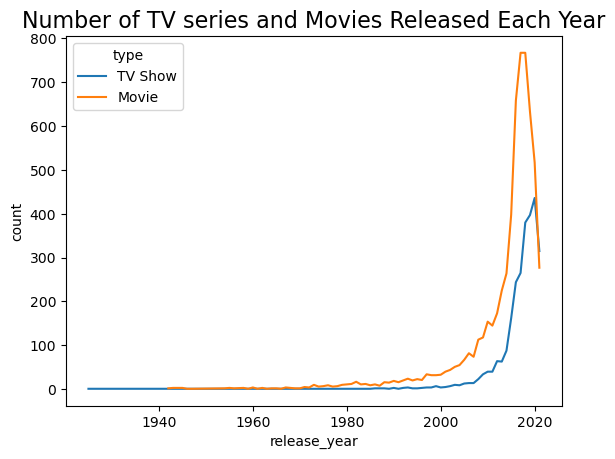

In [15]:
release_counts = df.groupby(['release_year', 'type']).size().reset_index(name='count')

sns.lineplot(data=release_counts, x='release_year', y='count', hue='type')
plt.title('Number of TV series and Movies Released Each Year', fontsize = 16)
plt.show()

In [16]:
df['year_added'] = df['year_added'].fillna(0).astype(int)

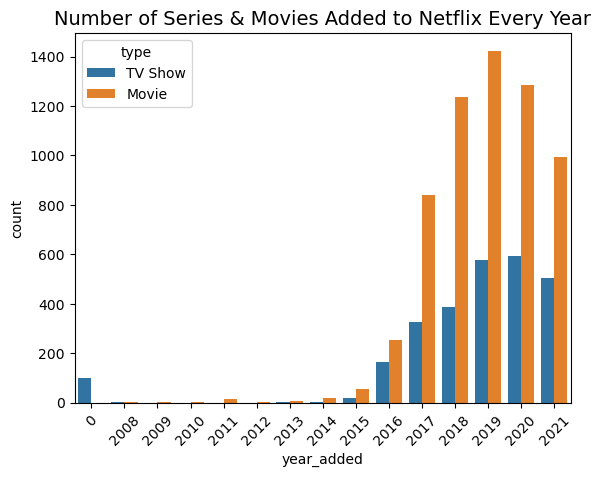

In [17]:
content_counts = df.groupby(['year_added', 'type']).size().reset_index(name = 'count')

sns.barplot(x = 'year_added', y = 'count', data = content_counts, hue = 'type')
plt.xticks(rotation = 45)
plt.title('Number of Series & Movies Added to Netflix Every Year', fontsize = 14)
plt.show()

In [18]:
df['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

C:\Users\user\AppData\Local\Temp\ipykernel_7772\1451831906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')


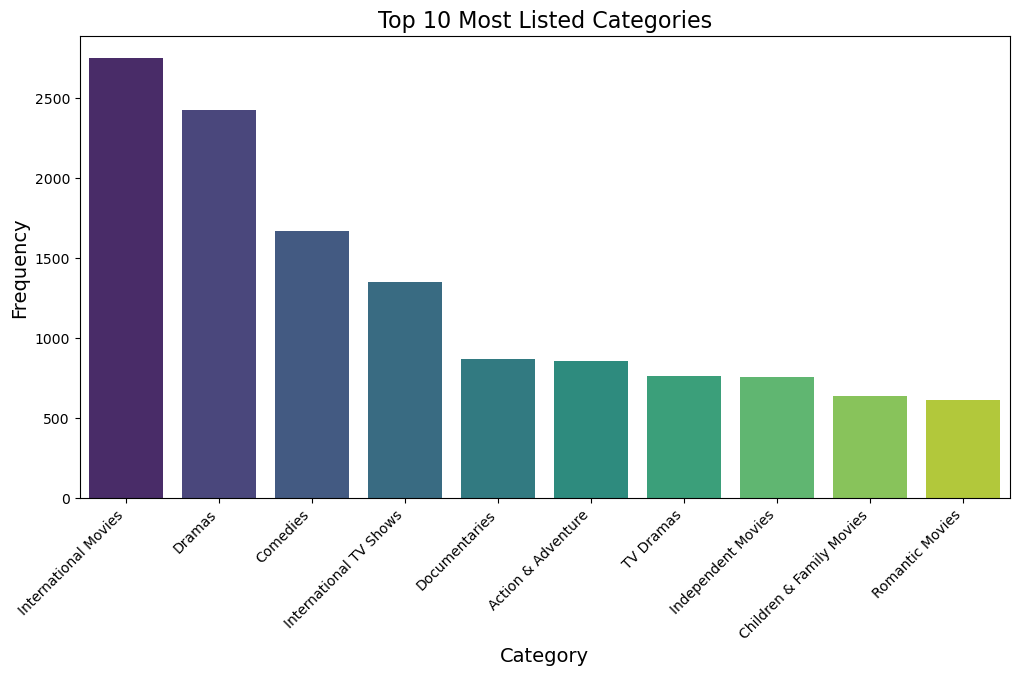

In [19]:
categories = df['listed_in'].str.split(',').explode().str.strip()
top_10_categories = categories.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')

plt.title('Top 10 Most Listed Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

In [20]:
Horror = df[df['listed_in'].isin(['Horror Movies', 'Thrillers'])]['release_year'].value_counts()

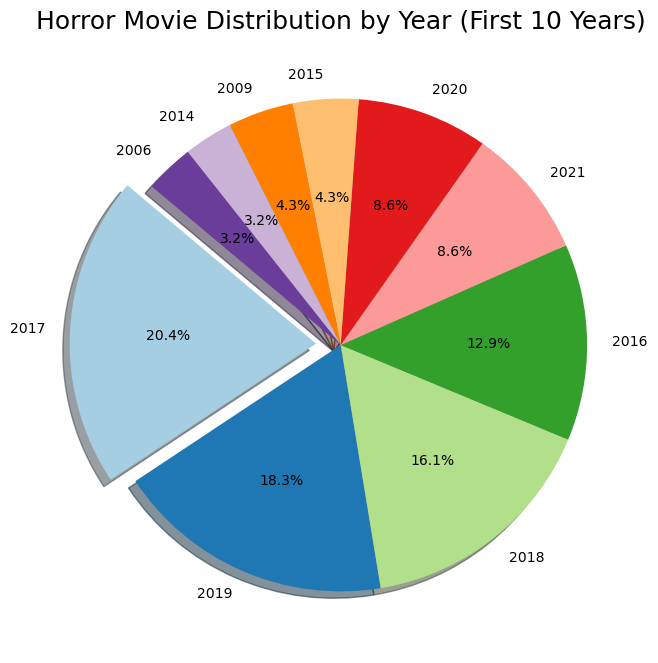

In [21]:
top_10_horror = Horror.sort_values(ascending=False).head(10)

explode = [0.1 if value == top_10_horror.max() else 0 for value in top_10_horror.values]

plt.figure(figsize=(8, 8))
plt.pie(top_10_horror.values, labels=top_10_horror.index, autopct='%1.1f%%', startangle=140, 
        explode=explode, colors=plt.cm.Paired.colors, shadow = 0.6)

plt.title('Horror Movie Distribution by Year (First 10 Years)', fontsize=18)
plt.show()

In [22]:
all_casts = df['cast'].dropna().str.split(',').explode().str.strip()

cast_counts = all_casts.value_counts()

top_10_casts = cast_counts.head(10)

top_10_casts

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_7772\896949081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_casts.values, y=top_10_casts.index, palette='viridis')


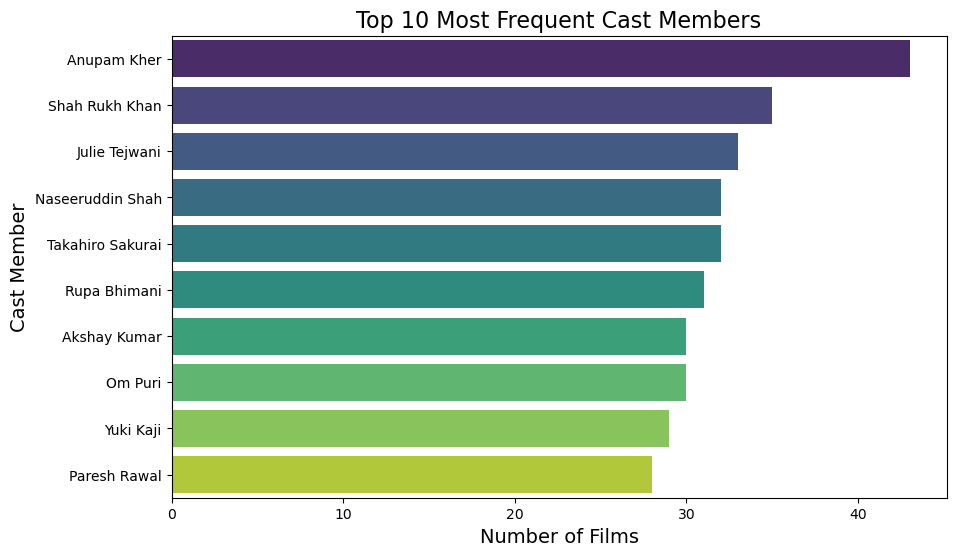

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_casts.values, y=top_10_casts.index, palette='viridis')

plt.title('Top 10 Most Frequent Cast Members', fontsize=16)
plt.xlabel('Number of Films', fontsize=14)
plt.ylabel('Cast Member', fontsize=14)

plt.show()

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

In [26]:
descriptions = df['description'].dropna().astype(str)

def clean_text(text): 
    text = re.sub(r'[^\w\s]', '', text)   
    text = re.sub(r'\d+', '', text)   
    text = text.lower()   
    return text
    
cleaned_descriptions = descriptions.apply(clean_text)

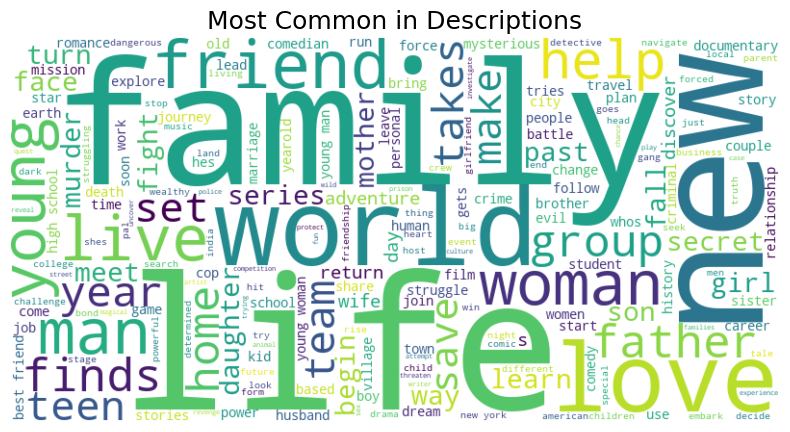

In [27]:
wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color='white', width=800, 
                      height=400).generate(' '.join(cleaned_descriptions))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common in Descriptions', fontsize=18)
plt.show()